In [1]:
%pip install pandas matplotlib numpy lets_plot


  Using cached lets_plot-4.5.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pypng-0.20220715.0-py3-none-any.whl.metadata (13 kB)
  Using cached palettable-3.3.3-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached lets_plot-4.5.1-cp312-cp312-win_amd64.whl (3.1 MB)
Using cached palettable-3.3.3-py2.py3-none-any.whl (332 kB)
Using cached pypng-0.20220715.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from lets_plot import *
LetsPlot.setup_html(no_js=True)
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [20]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [ ]:
1.Why have researchers chosen this particular measure over other measures (such as absolute temperature)?

 Temperature anomalies indicate how much warmer or colder it is than normal for a particular place and time. For the GISS analysis, normal always means the average over the 30-year period 1951-1980 for that place and time of year. This base period is specific to GISS, not universal. But note that trends do not depend on the choice of the base period: If the absolute temperature at a specific location is 2 degrees higher than a year ago, so is the corresponding temperature anomaly, no matter what base period is selected, since the normal temperature used as base point (which is subtracted from the absolute temperature to get the anomaly) is the same for both years.

Note that regional mean anomalies (in particular global anomalies) are not computed from the current absolute mean and the 1951-80 mean for that region, but from station temperature anomalies. Finding absolute regional means encounters significant difficulties that create large uncertainties. This is why the GISS analysis deals with anomalies rather than absolute temperatures. For a more detailed discussion of that topic, please see "The Elusive Absolute Temperature".

In [21]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1,1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB


In [23]:
df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [24]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.58,1.69,1.66,1.39,1.26,1.14,1.10,1.12,1.19,1.20,1.58,1.18,1.34,1.36,1.56,1.44,1.12,1.32
2021,1.25,0.95,1.20,1.12,1.04,1.20,1.07,1.02,1.04,1.29,1.29,1.16,1.14,1.14,1.13,1.12,1.10,1.21
2022,1.24,1.16,1.41,1.08,1.02,1.12,1.06,1.16,1.14,1.31,1.09,1.06,1.15,1.16,1.19,1.17,1.11,1.18
2023,1.29,1.29,1.63,1.01,1.12,1.19,1.44,1.57,1.67,1.88,1.97,1.85,1.49,1.43,1.21,1.26,1.40,1.84
2024,1.66,1.93,1.77,1.79,1.44,1.54,1.42,1.42,1.57,NaN,NaN,NaN,NaN,NaN,1.81,1.67,1.46,NaN


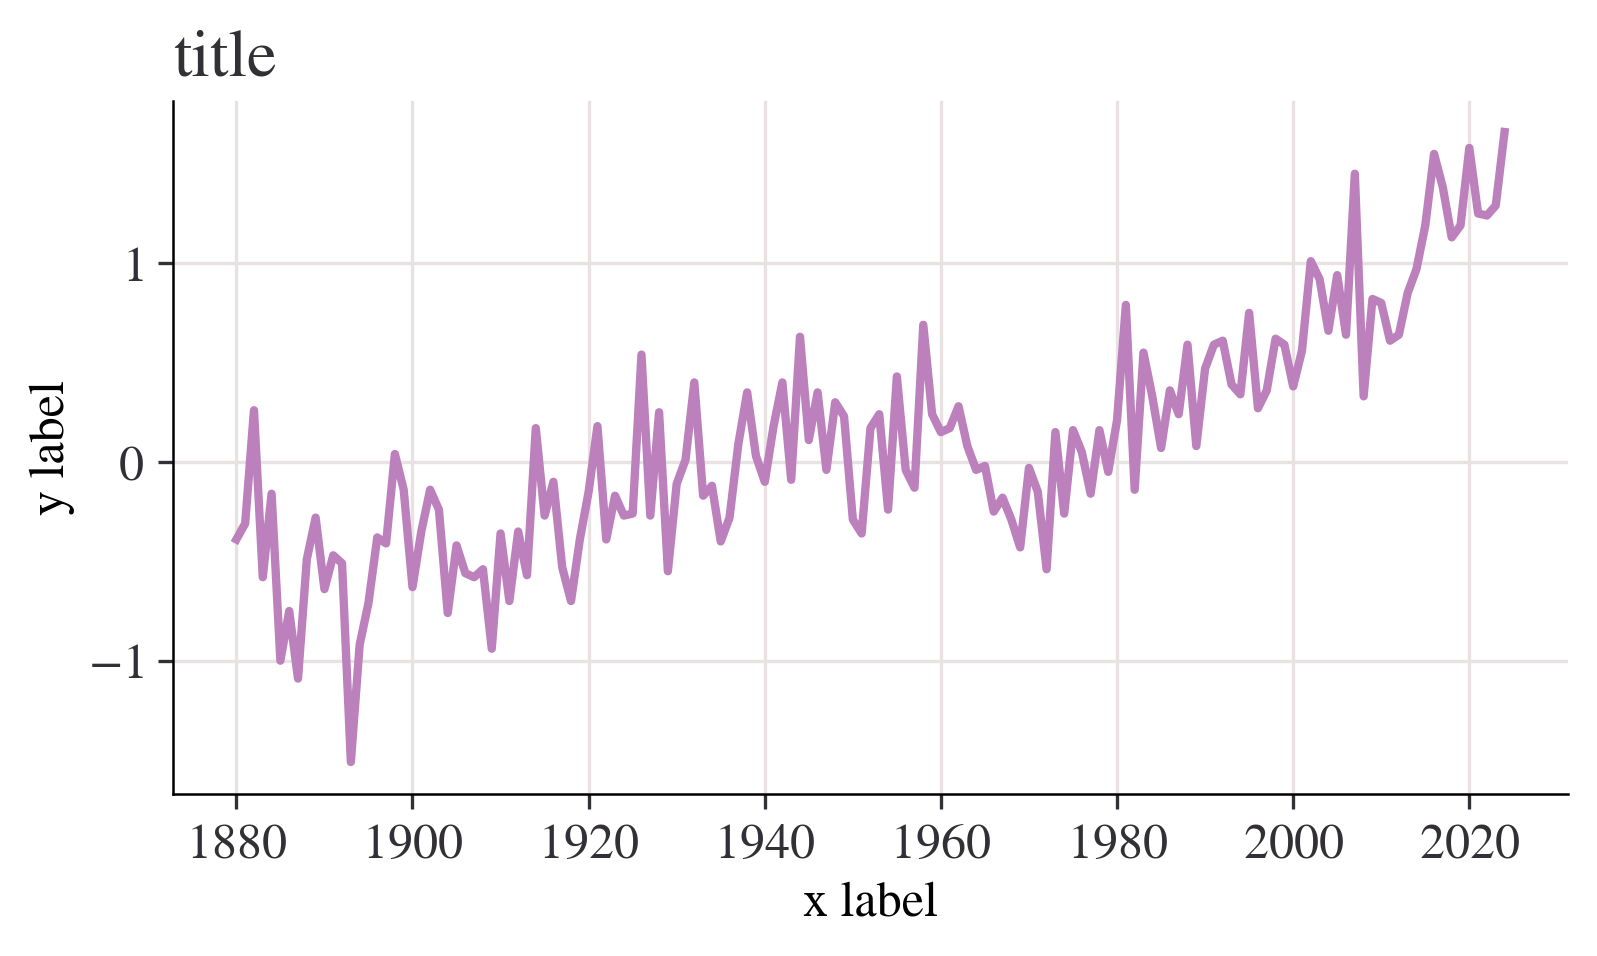

In [25]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

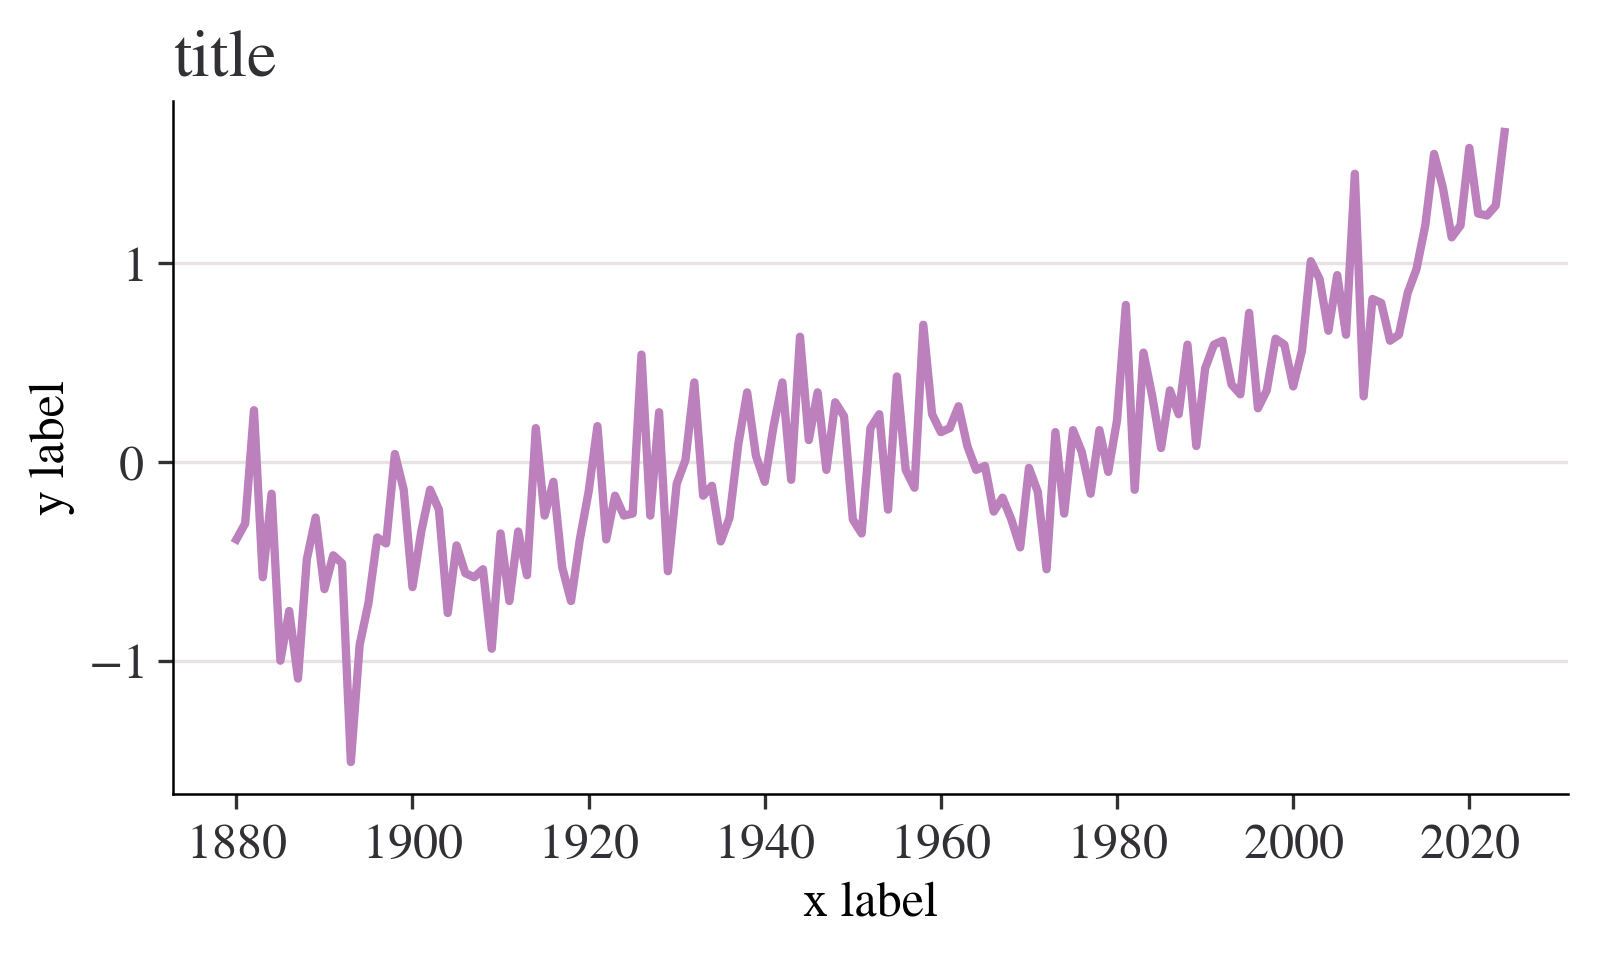

In [26]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

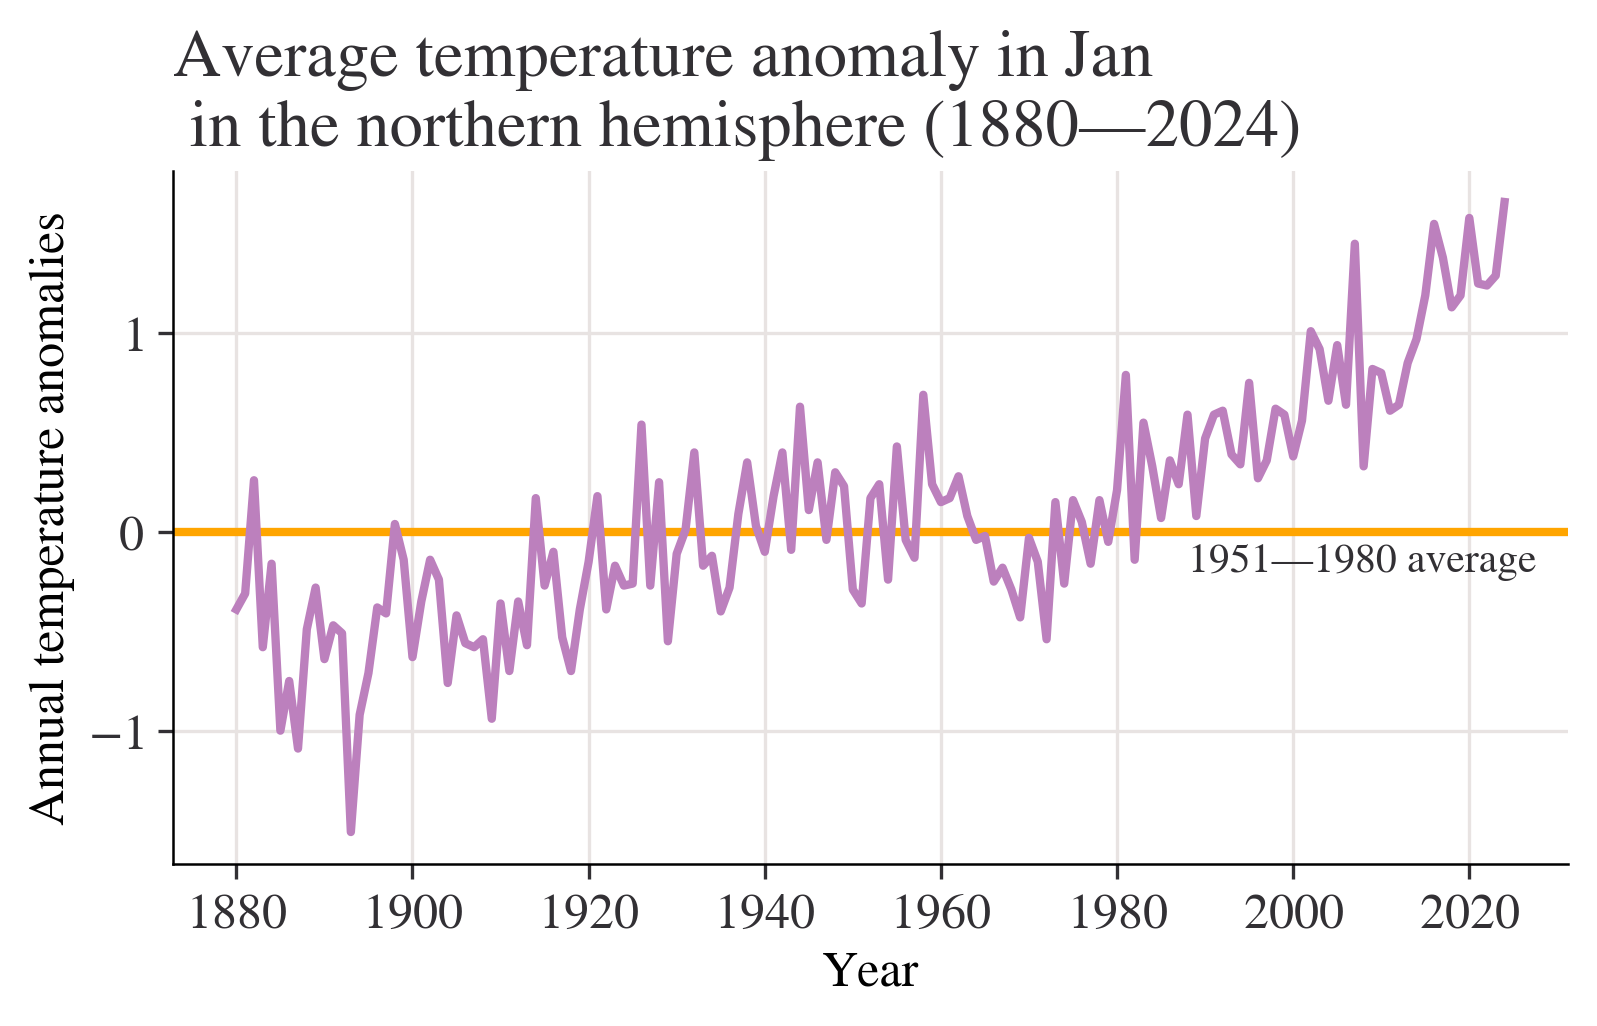

In [27]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

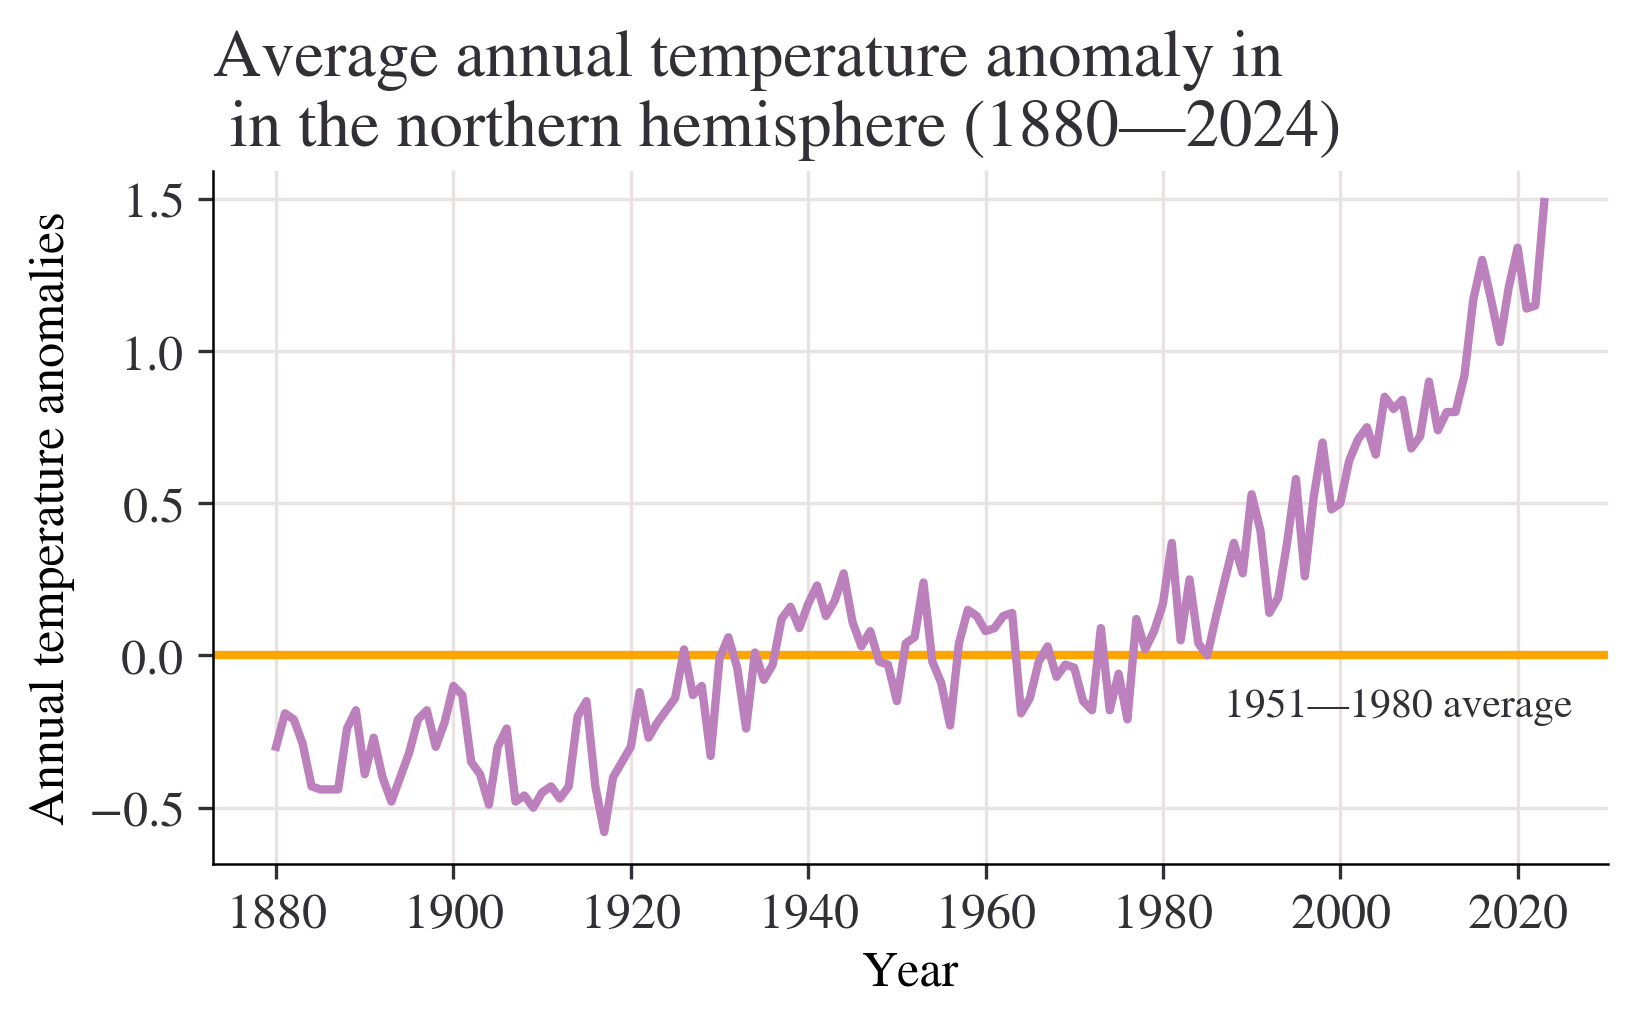

In [28]:
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

In [29]:
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [30]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.26
1881  Jun   -0.34
      Jul    0.09
dtype: float64

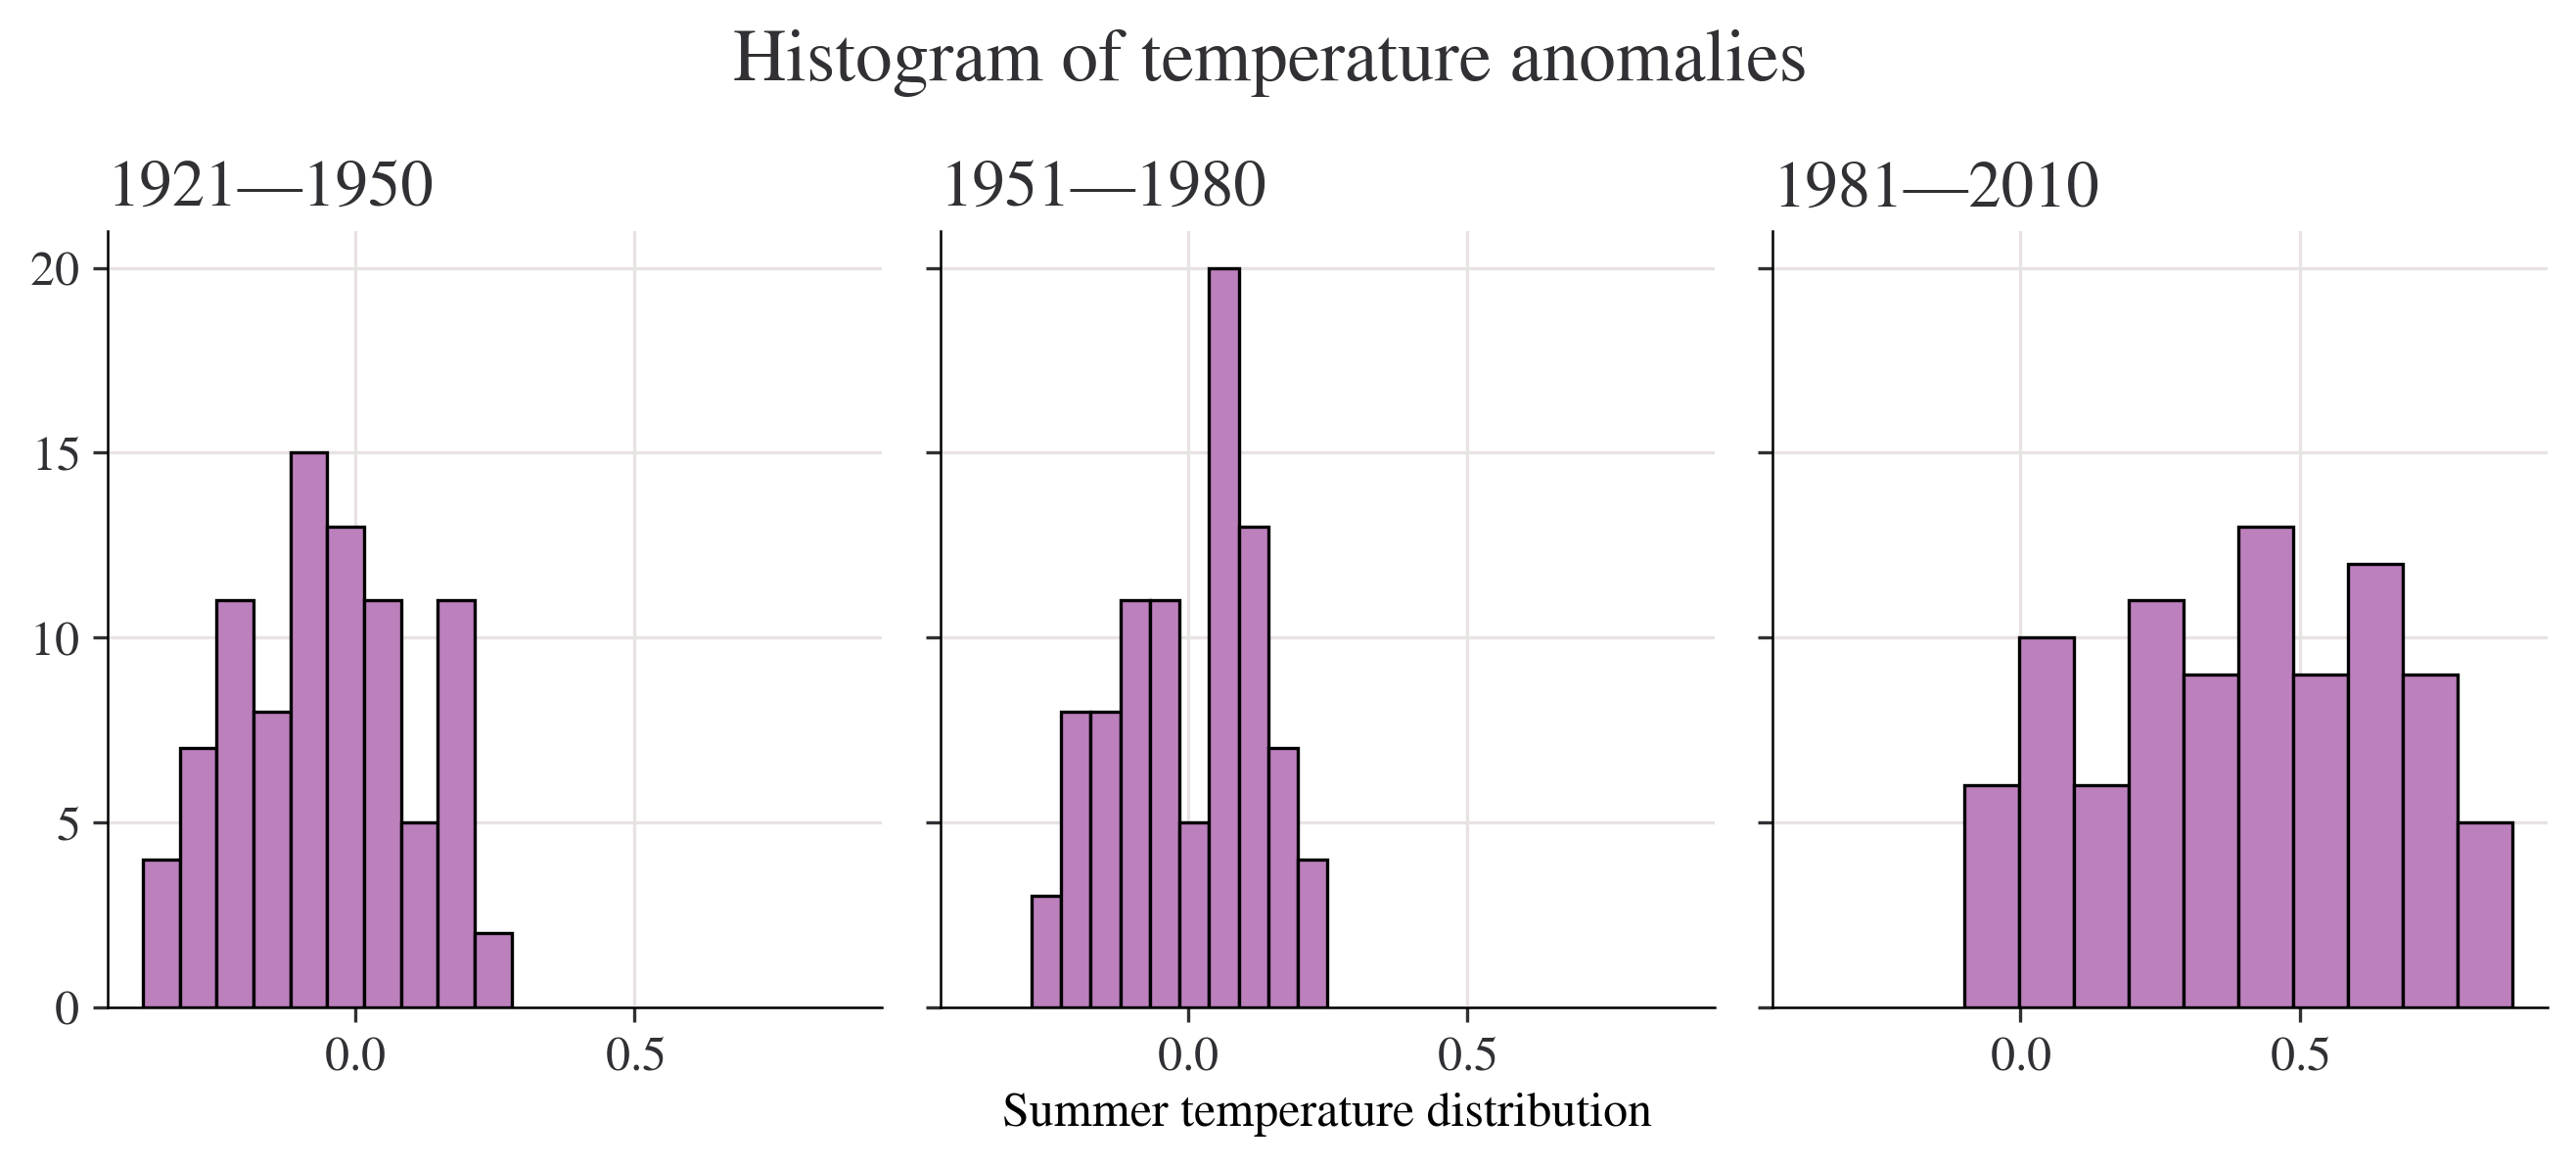

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

In [32]:
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.19
3,1951,Apr,0.07
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.09
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.20


In [33]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [34]:
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.79
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [35]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%


In [36]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [37]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
443,1991,DJF,0.51,1981—2010
444,1991,MAM,0.45,1981—2010
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.43,1981—2010
448,1992,MAM,0.30,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010


In [38]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\HP\AppData\Local\Temp\ipykernel_19472\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\HP\AppData\Local\Temp\ipykernel_19472\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x00000240F30980E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\HP\AppData\Local\Temp\ipykernel_19472\1563140002.py:1: FutureWarning: The provided callable <function var at 0x00000240F3098360> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will

mean       var
Season Period                       
DJF    1921—1950 -0.027931  0.057703
       1951—1980 -0.003333  0.050375
       1981—2010  0.522000  0.078644
JJA    1921—1950 -0.054483  0.021611
       1951—1980  0.001333  0.014640
       1981—2010  0.399000  0.067775
MAM    1921—1950 -0.041724  0.031136
       1951—1980  0.000333  0.025272
       1981—2010  0.507667  0.075812
SON    1921—1950  0.081379  0.027798
       1951—1980 -0.001333  0.026384
       1981—2010  0.427000  0.110739

In [40]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

In [45]:
df_co2 = pd.read_csv("D:\Yang Fan\data\data2(1).csv")
df_co2.head()

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\HP\AppData\Local\Temp\ipykernel_19472\2948700116.py:1: SyntaxWarning: invalid escape sequence '\Y'
  df_co2 = pd.read_csv("D:\Yang Fan\data\data2(1).csv")


,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


In [46]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [47]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [48]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [49]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.000000,0.914371
Trend,0.914371,1.000000


In [50]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [51]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)